In [1]:
import numpy as np
import pandas as pd
import seaborn
import torch
from IPython.display import HTML
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from torch import nn
from torch.nn import functional as F
from torch.optim import SGD
from torch.utils.tensorboard import writer

from utils.vis import plot_decision_space, visualize_data


RANDOM_STATE = 45

np.random.seed(RANDOM_STATE)

%matplotlib inline

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(7)

# DONT WORRY ABOUT THIS CODE VISUALIZATION ONLY

In [2]:
w = writer.SummaryWriter()

# Prepare and Visualize data

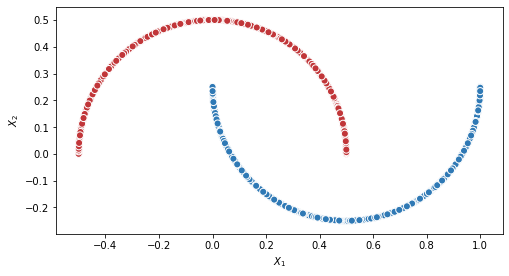

In [3]:
N_FEATURES = 2

X, Y = make_blobs(centers=2, random_state=RANDOM_STATE, n_features=N_FEATURES)
X, Y = make_moons(n_samples=1000)
X = X/np.abs(X).max()
visualize_data(X,Y)


In [4]:
data = pd.DataFrame(X, columns=['x1','x2'])
data['target'] = Y
data

,x1,x2,target
0,0.426294,-0.244538,1
1,0.020456,0.499581,0
2,-0.274998,0.417584,0
3,0.994767,0.177851,1
4,0.937910,0.008682,1
...,...,...,...
995,0.019062,0.113258,1
996,0.890776,-0.061921,1
997,0.189311,-0.141755,1
998,-0.430098,0.254981,0


In [5]:
pd.DataFrame(Y).head()

,0
0,1
1,0
2,0
3,1
4,1


# Define the perceptron


![alt text](https://cdn-images-1.medium.com/max/1600/1*-JtN9TWuoZMz7z9QKbT85A.png "Title")


In [6]:

input_tensor = torch.randn((1,2))

linear_layer = nn.Linear(2, 1, bias=False)

linear_layer(input_tensor)

print(linear_layer.weight)
print(input_tensor)
output = linear_layer(input_tensor)
print(output)

print(input_tensor.shape)
manual_output = input_tensor.mm(linear_layer.weight.transpose(0, 1))
print(manual_output)
assert output == manual_output

Parameter containing:
tensor([[-0.3779, -0.1060]], requires_grad=True)
tensor([[-0.1468,  0.7861]])
tensor([[-0.0278]], grad_fn=<MmBackward>)
torch.Size([1, 2])
tensor([[-0.0278]], grad_fn=<MmBackward>)


In [18]:

class Perceptron(nn.Module):
    def __init__(self, n_in):

        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(2, 10, bias=True)
        self.fc2 = nn.Linear(10, 10, bias=True)
        self.fc3 = nn.Linear(10, 10, bias=True)
        self.fc4 = nn.Linear(10, 10, bias=True)
        self.fc5 = nn.Linear(10, 10, bias=True)
        self.fc6 = nn.Linear(10, 1, bias=True)
        
    
    def forward(self, x):
        
        activ = F.tanh
        
    
        return self.fc6(activ(self.fc5(activ(self.fc4(activ(self.fc3(activ(self.fc2(activ(self.fc1(x)))))))))))

def custom_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.zeros_(m.weight)
#         m.weight.fill_(0)
        m.bias.data.fill_(0)
        
perceptron = Perceptron(2)

# Linear layers get their weights initialized by default, but you can reinitialize them if needed.
# perceptron.apply(custom_weights)

# print("fc weight", perceptron.fc.weight)
# print("bias weight", perceptron.fc.bias)

In [19]:
[p for p in dir(perceptron) if not p.startswith('_')]

['add_module',
 'apply',
 'buffers',
 'children',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 'fc1',
 'fc2',
 'fc3',
 'fc4',
 'fc5',
 'fc6',
 'float',
 'forward',
 'half',
 'load_state_dict',
 'modules',
 'named_buffers',
 'named_children',
 'named_modules',
 'named_parameters',
 'parameters',
 'register_backward_hook',
 'register_buffer',
 'register_forward_hook',
 'register_forward_pre_hook',
 'register_parameter',
 'requires_grad_',
 'share_memory',
 'state_dict',
 'to',
 'train',
 'training',
 'type',
 'zero_grad']

# Train Loop Using CrossEntropy



While using crossentropy loss our model needs to return (BS, n_classes) output tensor, the target has to be a coresponding dense label vector of shape (BS, 1)

In [22]:
# list(net.pa)
net = Perceptron(2)
list(net.parameters())
optimizer = SGD(net.parameters(), lr=0.1)
optimizer.__dict__

{'defaults': {'lr': 0.1,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False},
 'state': defaultdict(dict, {}),
 'param_groups': [{'params': [Parameter containing:
    tensor([[ 0.4762,  0.6767],
            [ 0.3896, -0.5657],
            [ 0.1766,  0.0711],
            [ 0.6174,  0.6611],
            [-0.3670, -0.0899],
            [-0.5915, -0.3342],
            [-0.3651, -0.4648],
            [-0.1525, -0.0417],
            [ 0.0058, -0.5955],
            [-0.6837, -0.0985]], requires_grad=True), Parameter containing:
    tensor([-0.3888, -0.0657, -0.3649,  0.3167,  0.2163, -0.5543,  0.3295,  0.0853,
            -0.2754,  0.5485], requires_grad=True), Parameter containing:
    tensor([[-0.0233,  0.1904,  0.2907, -0.0407, -0.2848,  0.2513, -0.0208,  0.2452,
              0.2239,  0.1766],
            [ 0.2482,  0.2936,  0.2006, -0.2572, -0.1537, -0.0431,  0.0689, -0.2900,
              0.3104,  0.0867],
            [ 0.2772,  0.1006, -0.0704, -0.2701, -0.0752

training epoch 0
training epoch 1
training epoch 2
training epoch 3
training epoch 4
training epoch 5
training epoch 6
training epoch 7
training epoch 8
training epoch 9
training epoch 10
training epoch 11
training epoch 12
training epoch 13
training epoch 14
training epoch 15
training epoch 16
training epoch 17
training epoch 18
training epoch 19
training epoch 20
training epoch 21
training epoch 22
training epoch 23
training epoch 24
input shape (BS, n_classes): torch.Size([1, 2])
target shape (BS, 1): torch.Size([1, 1])
output shape torch.Size([1, 1])


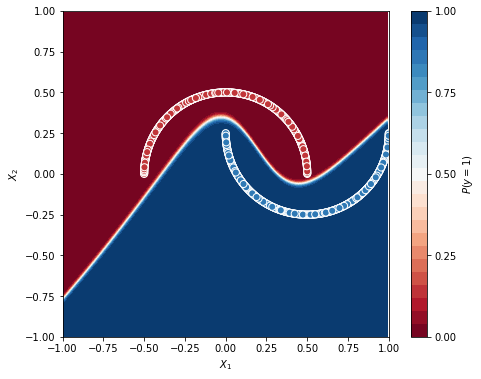

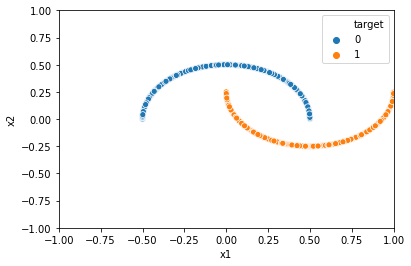

In [23]:
N_EPOCHS = 25

# init the model, loss and optimizer
net = Perceptron(2)

optimizer = SGD(net.parameters(), lr=0.03)
criterion = nn.BCEWithLogitsLoss()
net = net.to(DEVICE)
loss_history = []

w = writer.SummaryWriter(log_dir='./tblogs')


xs = torch.tensor(X[0]).unsqueeze(0).float().cuda()
w.add_graph(net, xs)

# w.add_image_with_boxes()

# neural_network.fit(X, y)
for epoch in range(N_EPOCHS):
    print("training epoch {}".format(epoch))
    
    
    
    for name, param in net.named_parameters():
        w.add_histogram(name, param.clone().cpu().data.numpy(), epoch)
    
    for xsample,ysample in zip(X, Y):
        optimizer.zero_grad() 
        # zero the gradients
        
        # batch preparation

        x = torch.Tensor(xsample).unsqueeze(0) # tensor([[0.8745, 0.5205]]) torch.Size([1, 2])
        y = torch.Tensor([ysample]).unsqueeze(0) # tensor([[1.]]) torch.Size([1, 1])
        x = x.to(DEVICE)
        y = y.to(DEVICE)
        
    
        
#         if True:
#             ix = np.random.randint(0, size=(4,), high=len(X))
#             x = torch.tensor((X[ix, :])).float()
#             y = torch.tensor(torch.Tensor(Y[ix]).reshape(-1,1)).float()
#             x = x.to(DEVICE)
#             y = y.to(DEVICE)
        
        # forward pass
        out = net(x)

        # loss calculation
        loss = criterion(out, y)

        # calculating gradients
        loss.backward()
        

        # changing the weights by specified(in the optimizer init) learning rate
        optimizer.step()
        
        #append calculated loss to the history
        loss_history.append(loss.detach().cpu().numpy())
        
    for name, param in net.named_parameters():
        w.add_histogram(name + 'grad', param.grad.clone().cpu().data.numpy(), epoch)

    w.add_scalar('train/loss', loss.detach().data, epoch)
#     calculate_acc(net, X, Y)
        
#     plot_decision_boundry(net, X)
# at the end plot final solution in red
# plot_decision_boundry(net, X, 'r-')
seaborn.scatterplot(x='x1',y='x2', hue='target', data=data)
plt.xlim((-1, 1))
plt.ylim((-1, 1))

f = plot_decision_space(net, X, Y)

w.add_figure('ddlkd', f)
w.close()

        
print("input shape (BS, n_classes):", x.shape)
print("target shape (BS, 1):", y.shape)
print("output shape", out.shape)
f
# def score_model(net, X, Y)